<a href="https://colab.research.google.com/github/shakib68/Netflix-capstone4/blob/main/Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

#Data Inspection

**Importing all needed libraries**

In [163]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


%matplotlib inline

In [164]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading Given Data**

In [165]:
#Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/capstone Project 4/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [166]:
# top 5 rows of dataset 
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [167]:
#last 5 rows of the dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [168]:
# Total number of rows and columns of dataset
df.shape

(7787, 12)

rows= 7787
column=12

In [169]:
#statistical details like percentile, mean, std, max etc.
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [170]:
# data types and null count of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [171]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**Null Values are present in our dataset**

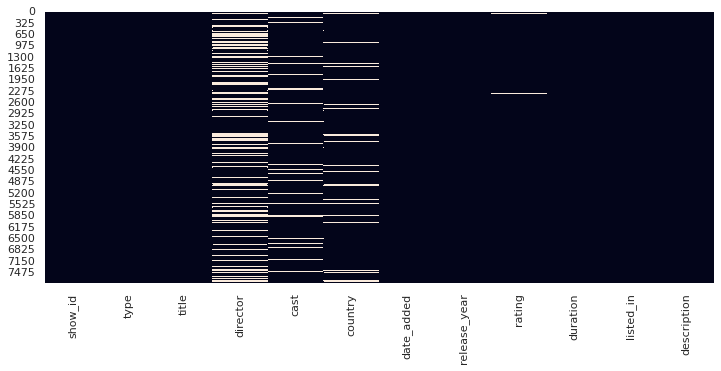

In [172]:
# plotting the data with respect to analyse null values in the data
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False)

**Column director,cast,country and date_added contains null values.**

#Data Cleaning

Treatment of null value in coulmn director and cast

In [174]:
filtered_directors = df[df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

In [177]:
filtered_cast = df[df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

As in date_added only 10 rows contain null value so we will remove only those rows

In [156]:
#df['director'].fillna(df['director'].mode()[0], inplace=True)

In [157]:
#removing rows with nan values
df = df[df['date_added'].notna()]


Introducing a new column year added to get year in which movie is added to netflix

In [158]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])

**Filling null value in country column with the country which occur maximum time.**

In [159]:
df['country'].fillna(df['country'].mode()[0], inplace=True)


In [160]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,"Raúl Campos, Jan Suter","João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


#EDA

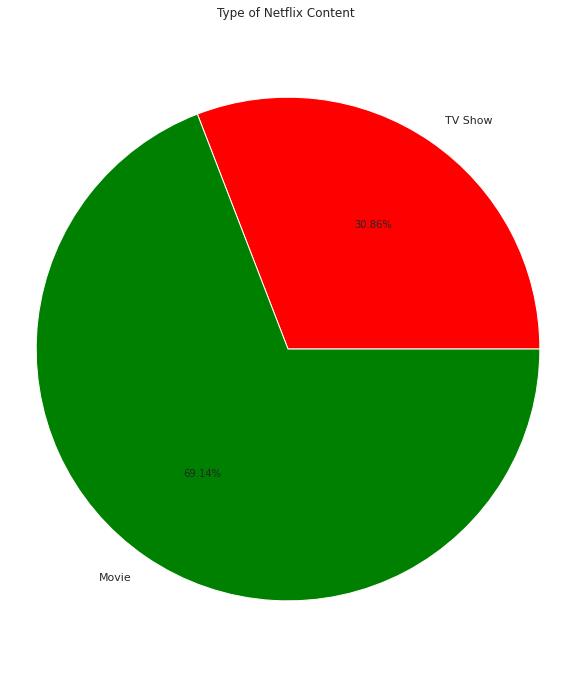

In [73]:
#plotting pie chart on type feature
plt.figure(figsize=(10, 12))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,
        autopct='%1.2f%%',colors=['red','green'])
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

In [74]:
#Counting number of movies and TV shows with respect to year
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]
year_df = df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"}).sort_values(by=['year'])
movies_year_df = df_movies.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"}).sort_values(by=['year'])
shows_year_df = df_tv.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"}).sort_values(by=['year'])
year_df.sort_values(by=['year'])

,year,count
11,2008,2
12,2009,2
13,2010,1
8,2011,13
10,2012,3
9,2013,11
7,2014,25
6,2015,88
4,2016,443
3,2017,1225


**Analysing number movie and tv show in a year**

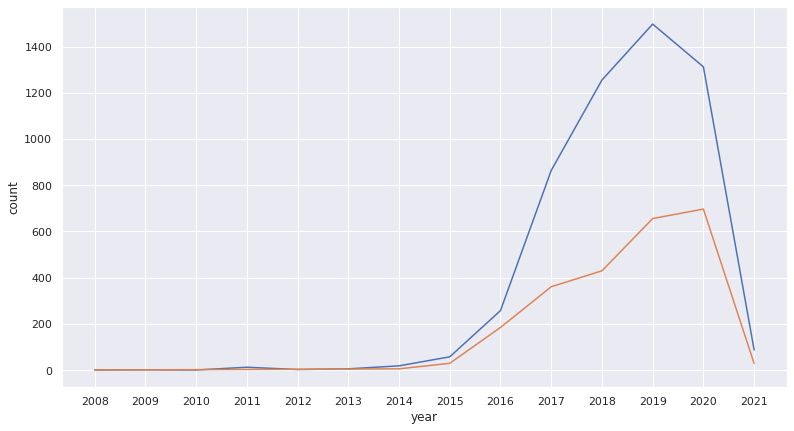

In [75]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=movies_year_df,x='year',y='count')
sns.lineplot(data=shows_year_df,x='year',y='count')
#ax.set_xticks(np.arange(2008, 2020, 1))
#plt.title(“Total content added across all years (up to 2019)”)
##plt.legend([‘Total’,’Movie’,’TV Show’])
#plt.ylabel(“Releases”)
#plt.xlabel(“Year”)
plt.show()



Blue- TV show

Orange- Movies

**Counting movies and TV show**

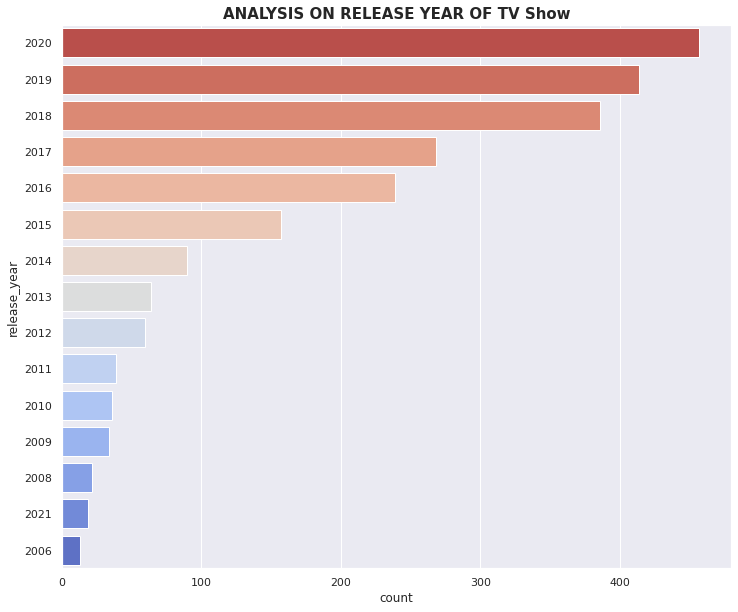

In [76]:
#plotting release year of TV show
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_tv, palette="coolwarm_r", order=df_tv['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

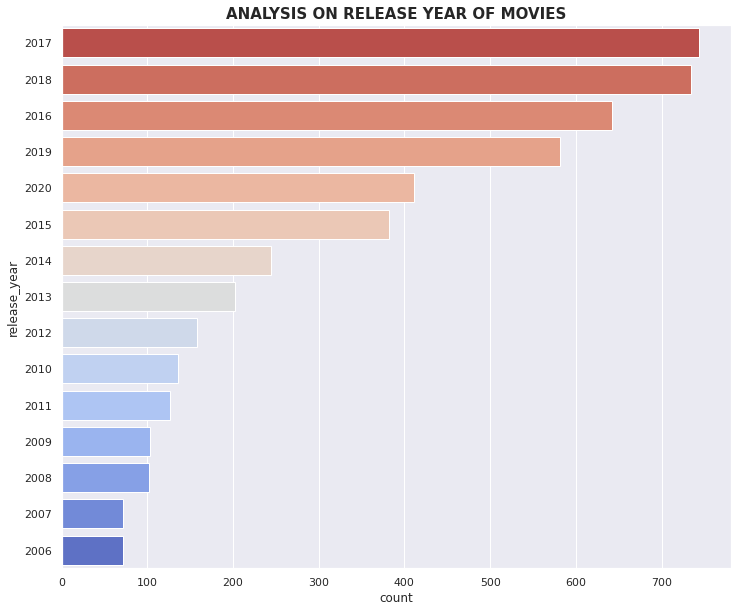

In [77]:
#plotting release year of movies
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_movies, palette="coolwarm_r", order=df_movies['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

**Counting number tv show and movies with respect to country**

In [78]:
df['country'].value_counts().head(10)

United States     3055
India              923
United Kingdom     396
Japan              225
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: country, dtype: int64

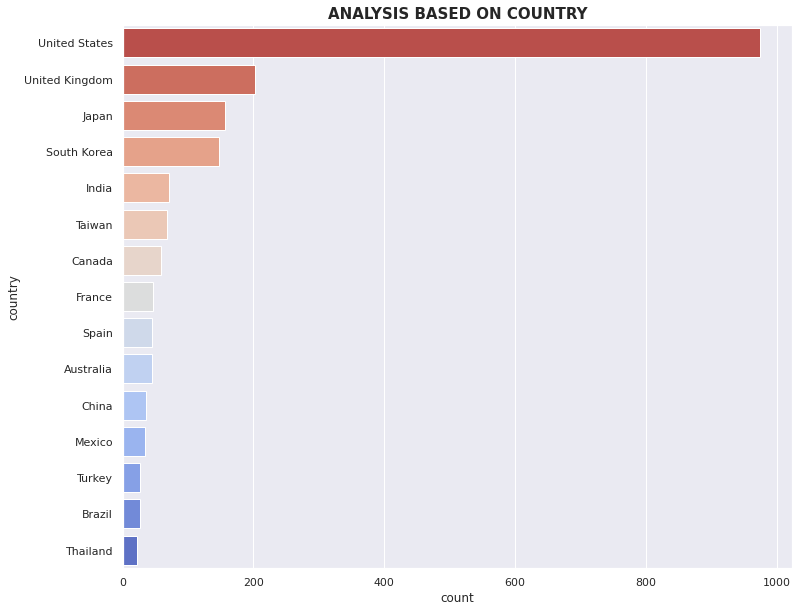

In [79]:


#plotting release year of TV show
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="country", data=df_tv, palette="coolwarm_r", order=df_tv['country'].value_counts().index[0:15])

plt.title('ANALYSIS BASED ON COUNTRY', fontsize=15, fontweight='bold')
plt.show()

United states have the most number of content

**Top 10 director whose content is available in netflix**

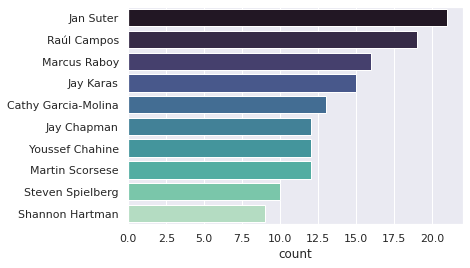

In [175]:
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='mako')
plt.show()


**Top 10 actors whose content is available in netflix**

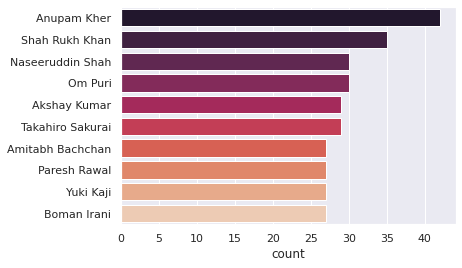

In [178]:
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='rocket')
plt.show()

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   show_id        7777 non-null   object
 1   type           7777 non-null   object
 2   title          7777 non-null   object
 3   country        7777 non-null   object
 4   date_added     7777 non-null   object
 5   release_year   7777 non-null   int64 
 6   rating         7770 non-null   object
 7   duration       7777 non-null   object
 8   listed_in      7777 non-null   object
 9   description    7777 non-null   object
 10  year_added     7777 non-null   object
 11  month          7777 non-null   object
 12  length         7777 non-null   int64 
 13  length_listed  7777 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 1.1+ MB


In [80]:
df_tv.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
5,s6,TV Show,46,Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017
11,s12,TV Show,1983,"Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018
12,s13,TV Show,1994,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019
16,s17,TV Show,Feb-09,United States,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019


**Group by TV rating and movie rating to get insight**

In [81]:
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)

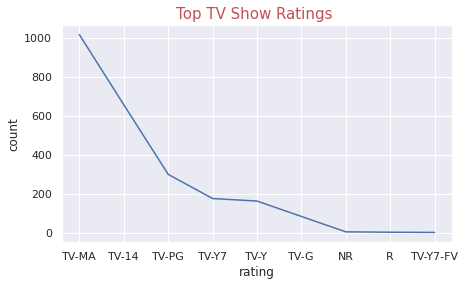

In [82]:
#linetplot on top tv show ratings 
fig_dims = (7,4)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.lineplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings ',size='15',color='r')
plt.show()

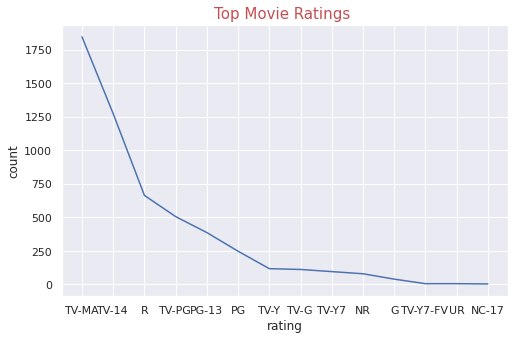

In [83]:
#inetplot on top movie ratings
movie_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.lineplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings ',size='15',color='r')
plt.show()

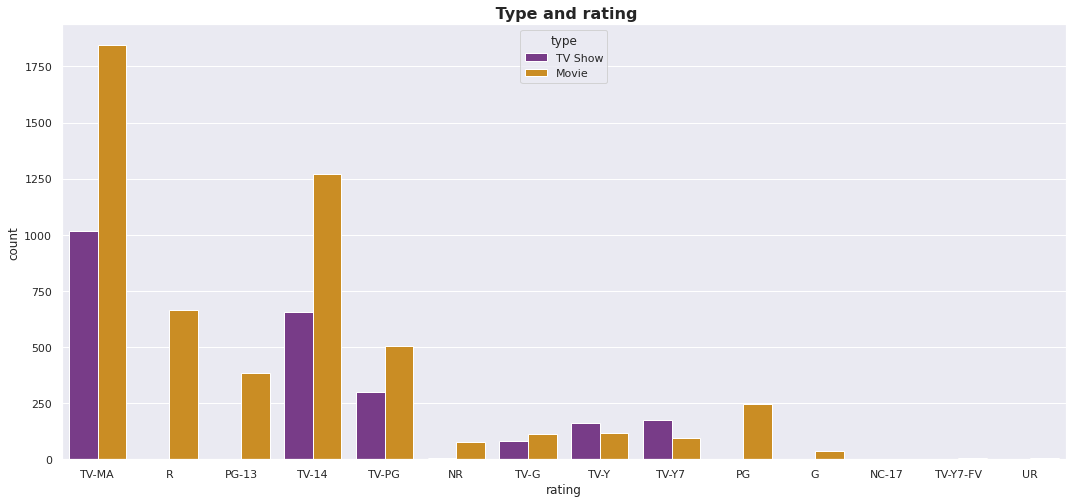

In [84]:
# Rating
plt.figure(figsize=(18,8))
sns.countplot(x='rating',hue='type',data=df,palette="CMRmap")
plt.title(' Type and rating',size='16',fontweight="bold")
plt.show()

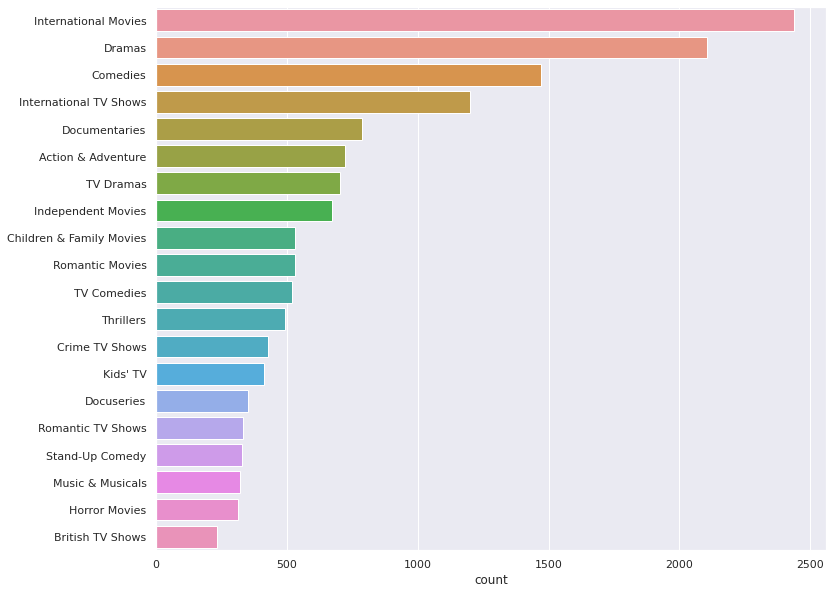

In [85]:
#plotting content 
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(12,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])

International movies and drama has highest number of content

**Top genre added in netflix**

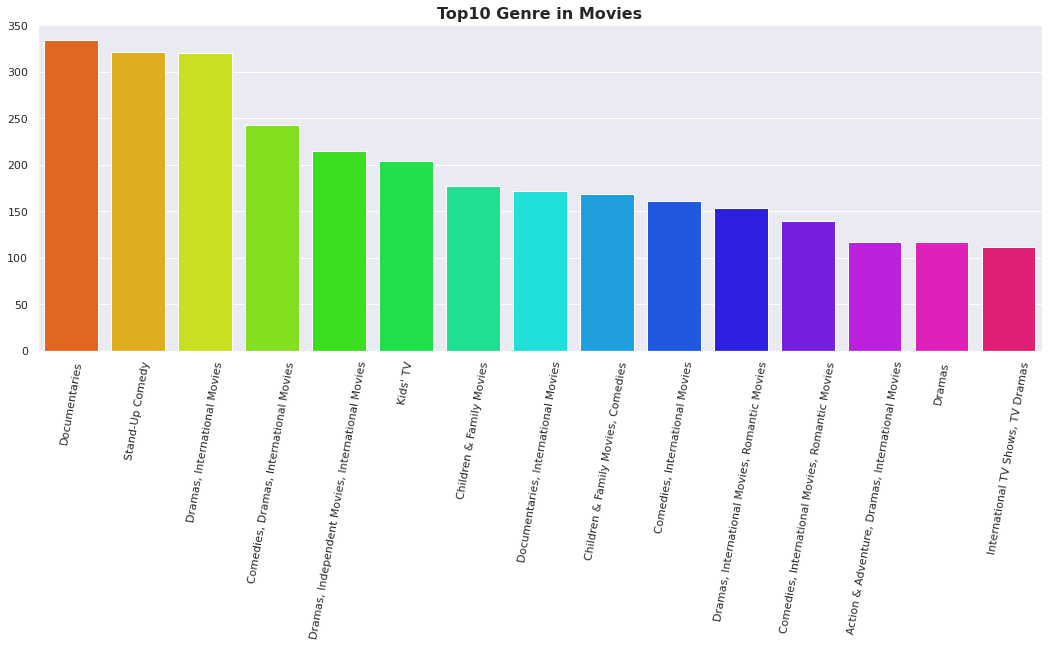

In [86]:
# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = df["listed_in"].value_counts().head(15).index,
            y = df["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

**Creating a new feature month to analyse data on monthly basis**

In [87]:
df["month"]=df['date_added'].str.split(' ').str[0]
df_month = df.groupby(["month"])['show_id'].count().reset_index(name = 'count')
df_month=df_month.drop([0])
df_month

,month,count
1,April,596
2,August,612
3,December,817
4,February,466
5,January,746
6,July,592
7,June,538
8,March,661
9,May,537
10,November,730


In [88]:
sort_dict = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_month['month']=pd.Categorical(df_month['month'],categories=sort_dict)
#df_month=df_month.reset_index(drop=True)
#df_month=df_month.sort_values(by='month')
df_month.sort_values(by='month',inplace=True)
df_month

,month,count
5,January,746
4,February,466
8,March,661
1,April,596
9,May,537
7,June,538
6,July,592
2,August,612
12,September,614
11,October,780


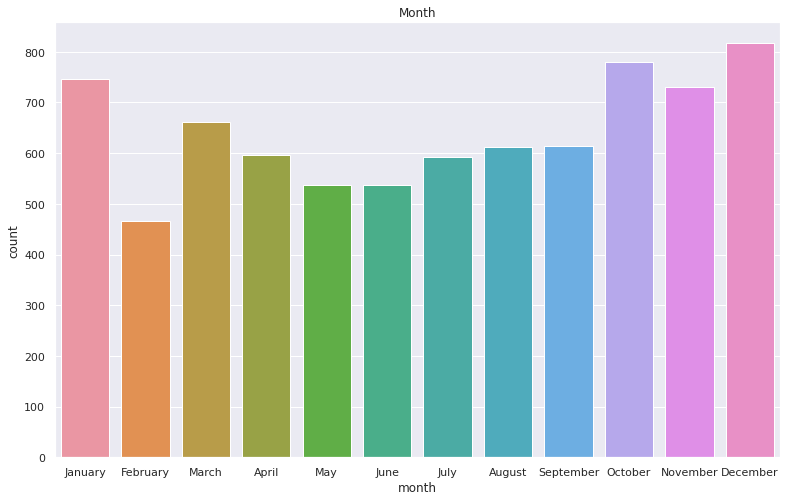

In [89]:
#content added monthwise
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='month',y='count',data=df_month)

we can see that, In netflix maximum content added in December and minimum in february

**Released content in different countries**

In [90]:
#content avaliable in different countries
ab = df.groupby('type')['country'].value_counts()


In [91]:
#Type movie available in different countries
ab.head(25)

type   country                      
Movie  United States                    2080
       India                             852
       United Kingdom                    193
       Canada                            118
       Egypt                              89
       Spain                              89
       Turkey                             73
       Philippines                        70
       France                             69
       Japan                              69
       Indonesia                          68
       Mexico                             65
       Nigeria                            62
       United Kingdom, United States      52
       Hong Kong                          49
       Brazil                             46
       Germany                            42
       United States, Canada              38
       Australia                          37
       South Korea                        36
       Thailand                           35
       Argentina  

**Analysis with the use of wordcloud library**

#Data Preprocessing

In [92]:

df['description'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [93]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

**Removing Punctuation**

In [94]:
df2=df
import nltk
nltk.download('punkt')
#translator = str.maketrans('', '', string.punctuation)
df2['description'] = df2['description'].apply(lambda x:nltk.word_tokenize(x))
print(df2['description'])
df2['description'] =df2['description'].apply(lambda x:[word.lower() for word in x if word.isalpha()])
df2['description'] =df2['description'].apply(lambda x:" ".join(x))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0       [In, a, future, where, the, elite, inhabit, an...
1       [After, a, devastating, earthquake, hits, Mexi...
2       [When, an, army, recruit, is, found, dead, ,, ...
3       [In, a, postapocalyptic, world, ,, rag-doll, r...
4       [A, brilliant, group, of, students, become, ca...
                              ...                        
7782    [When, Lebanon, 's, Civil, War, deprives, Zozo...
7783    [A, scrappy, but, poor, boy, worms, his, way, ...
7784    [In, this, documentary, ,, South, African, rap...
7785    [Dessert, wizard, Adriano, Zumbo, looks, for, ...
7786    [This, documentary, delves, into, the, mystiqu...
Name: description, Length: 7777, dtype: object


**Removing stopwords**

In [95]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Displaying stopwords

In [96]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [97]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [98]:
df['description'] = df['description'].apply(lambda x:[word.lower() for word in x.split(' ') if word.lower() not in sw])
df['description'] =df['description'].apply(lambda x:" ".join(x))

**Finding top words before stemming**

In [99]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

**Store the vocab and counts in a pandas dataframe**

In [100]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values()

In [101]:
vocab_bef_stem.tail(20)

zordon        17375
zorro         17376
zoya          17377
zozo          17378
zoé           17379
zuckerberg    17380
zuhu          17381
zulu          17382
zumbo         17383
zurich        17384
zé            17385
álex          17386
álvaro        17387
ángel         17388
émile         17389
ömer          17390
über          17391
łukasz        17392
ōarai         17393
şeref         17394
dtype: int64

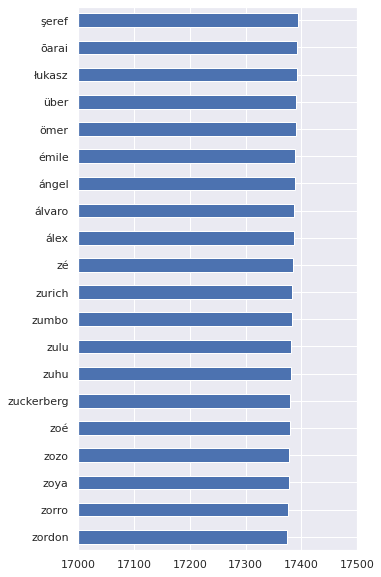

In [102]:
top_vacab = vocab_bef_stem.tail(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (17000, 17500))

Function for stemming operation

In [103]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

Applying stemming function to each example

In [104]:
#stemming for description
stemmer = SnowballStemmer("english")
df['description'] = df['description'].apply(lambda x:[stemmer.stem(word) for word in x.split()])
df['description'] =df['description'].apply(lambda x:" ".join(x))
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2016,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2018,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world robot hide fear danger mac...,2017,November
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,brilliant group student becom expert intent sw...,2020,January


**Finding top words after stemming **

In [105]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [106]:
df['length'] = df['description'].apply(len)

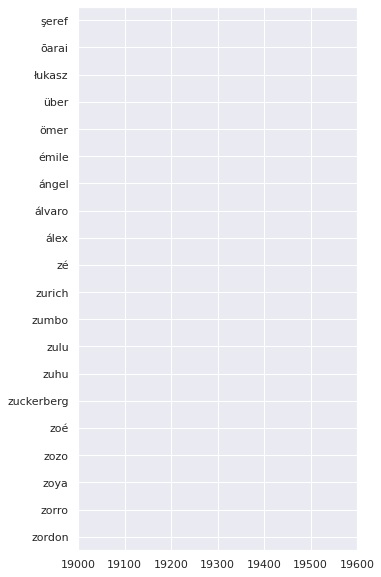

In [107]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values()
# plot of the top vocab
top_vacab = vocab_after_stem.tail(20)
top_vacab.plot(kind = 'barh', figsize=(5,10),xlim= (19000,19600))

**Same process for listed_in column**

In [108]:
#translator = str.maketrans('', '', string.punctuation)
df2['description'] = df2['description'].apply(lambda x:nltk.word_tokenize(x))

df2['description'] =df2['description'].apply(lambda x:[word.lower() for word in x if word.isalpha()])
df2['description'] =df2['description'].apply(lambda x:" ".join(x))
print(df2['description'])

0       futur elit inhabit island paradis far crowd sl...
1       devast earthquak hit mexico citi trap survivor...
2       armi recruit found dead fellow soldier forc co...
3       postapocalypt world robot hide fear danger mac...
4       brilliant group student becom expert intent sw...
                              ...                        
7782    lebanon civil war depriv zozo famili left grie...
7783    scrappi poor boy worm way tycoon dysfunct fami...
7784    documentari south african rapper nasti c hit s...
7785    dessert wizard adriano zumbo look next willi w...
7786    documentari delv mystiqu behind trio explor en...
Name: description, Length: 7777, dtype: object


In [109]:
#Remove stopwords for listed_in
df['listed_in'] = df['listed_in'].apply(lambda x:[word.lower() for word in x.split() if word.lower() not in sw])
df['listed_in'] =df['listed_in'].apply(lambda x:" ".join(x))

In [110]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['listed_in'])
# collect the vocabulary items used in the vectorizer
dictionary_l = count_vectorizer.vocabulary_.items()

In [111]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary_l:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values()

In [112]:
vocab_bef_stem

action            0
adventure         1
anime             2
british           3
children          4
classic           5
comedies          6
comedy            7
crime             8
cult              9
documentaries    10
docuseries       11
dramas           12
faith            13
family           14
fantasy          15
features         16
fi               17
horror           18
independent      19
international    20
kids             21
korean           22
language         23
lgbtq            24
movies           25
music            26
musicals         27
mysteries        28
nature           29
reality          30
romantic         31
sci              32
science          33
series           34
shows            35
spanish          36
spirituality     37
sports           38
stand            39
talk             40
teen             41
thrillers        42
tv               43
up               44
dtype: int64

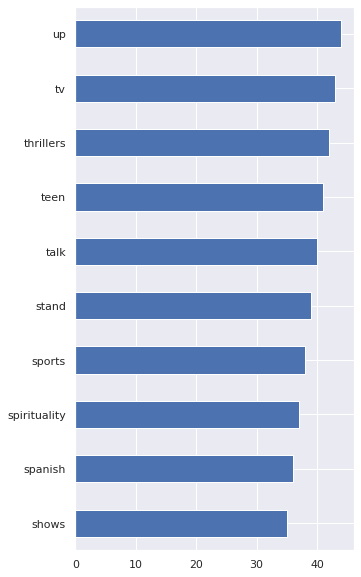

In [113]:
#plotting top words
top_vacab = vocab_bef_stem.tail(10)
top_vacab.plot(kind = 'barh', figsize=(5,10))


In [114]:
#stemming for listed_in

stemmer = SnowballStemmer("english")
df['listed_in'] = df['listed_in'].apply(lambda x:[stemmer.stem(word) for word in x.split()])
df['listed_in'] =df['listed_in'].apply(lambda x:" ".join(x))

In [115]:
# create the object of tfid vectorizer
vectorizer = TfidfVectorizer(stop_words="english")

# fit the vectorizer using the text data
vectorizer.fit(df['listed_in'])

# collect the vocabulary items used in the vectorizer
dictionary_listed_in = vectorizer.vocabulary_.items()


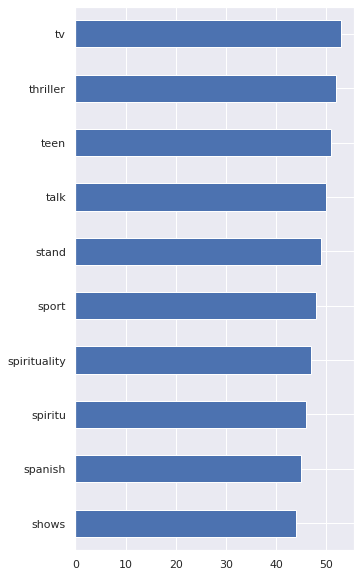

In [116]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary_listed_in:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values()
# plot of the top vocab
top_vacab = vocab_after_stem.tail(10)
top_vacab.plot(kind = 'barh', figsize=(5,10))

In [117]:
df['length_listed'] = df['listed_in'].apply(len)

In [118]:
df[['description','listed_in']]

,description,listed_in
0,futur elit inhabit island paradis far crowd sl...,"intern tv shows, tv dramas, tv sci-fi & fantasi"
1,devast earthquak hit mexico citi trap survivor...,"dramas, intern movi"
2,armi recruit found dead fellow soldier forc co...,"horror movies, intern movi"
3,postapocalypt world robot hide fear danger mac...,"action & adventure, independ movies, sci-fi & ..."
4,brilliant group student becom expert intent sw...,drama
...,...,...
7782,lebanon civil war depriv zozo famili left grie...,"dramas, intern movi"
7783,scrappi poor boy worm way tycoon dysfunct fami...,"dramas, intern movies, music & music"
7784,documentari south african rapper nasti c hit s...,"documentaries, intern movies, music & music"
7785,dessert wizard adriano zumbo look next willi w...,"intern tv shows, realiti tv"


#Silhouette Score Method


**To get optimum number of cluster and evaluation of model**

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

In [119]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
X_features_rec_mon=df[['length','length_listed']]
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3464545679695723
For n_clusters = 3, silhouette score is 0.3565227189828743
For n_clusters = 4, silhouette score is 0.32912833068983727
For n_clusters = 5, silhouette score is 0.3100200495164957
For n_clusters = 6, silhouette score is 0.3230922037219166
For n_clusters = 7, silhouette score is 0.3227074518720564
For n_clusters = 8, silhouette score is 0.3265834937545406
For n_clusters = 9, silhouette score is 0.32960200984857285
For n_clusters = 10, silhouette score is 0.33232403135571137
For n_clusters = 11, silhouette score is 0.3361476873968308
For n_clusters = 12, silhouette score is 0.3367372406132354
For n_clusters = 13, silhouette score is 0.3295331832834738
For n_clusters = 14, silhouette score is 0.3328285103535483
For n_clusters = 15, silhouette score is 0.3384347193364703


Highest score is for k=3

**Analysis for different value of k**

For n_clusters = 2 The average silhouette_score is : 0.34651445349074333
For n_clusters = 3 The average silhouette_score is : 0.35601785496428634
For n_clusters = 4 The average silhouette_score is : 0.3286146027042225
For n_clusters = 5 The average silhouette_score is : 0.30947455147747543
For n_clusters = 6 The average silhouette_score is : 0.32344712388842245
For n_clusters = 7 The average silhouette_score is : 0.3226335179539019
For n_clusters = 8 The average silhouette_score is : 0.32888970443429844
For n_clusters = 9 The average silhouette_score is : 0.32176874926816396
For n_clusters = 10 The average silhouette_score is : 0.33222299770367564
For n_clusters = 11 The average silhouette_score is : 0.3366394994899641
For n_clusters = 12 The average silhouette_score is : 0.33595355789186865
For n_clusters = 13 The average silhouette_score is : 0.3292303807036428
For n_clusters = 14 The average silhouette_score is : 0.33436480363431315
For n_clusters = 15 The average silhouette_score i

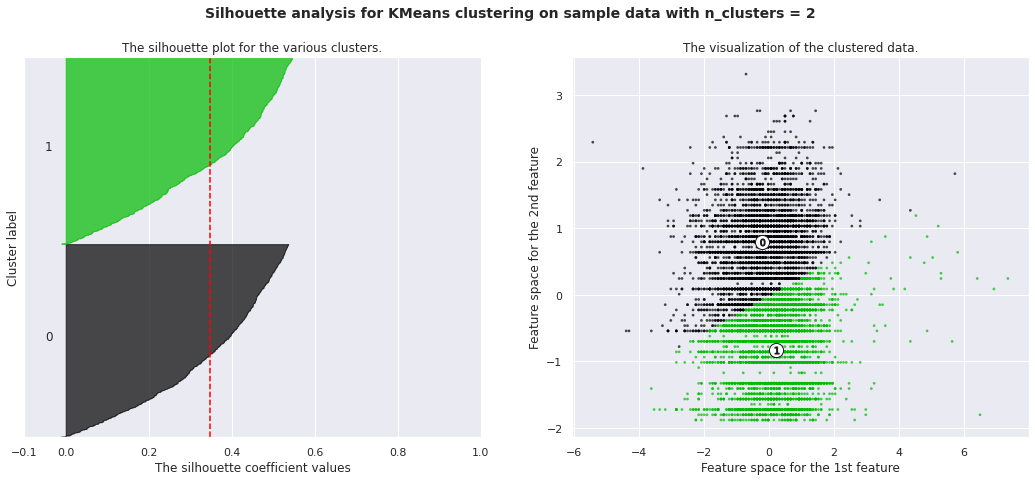

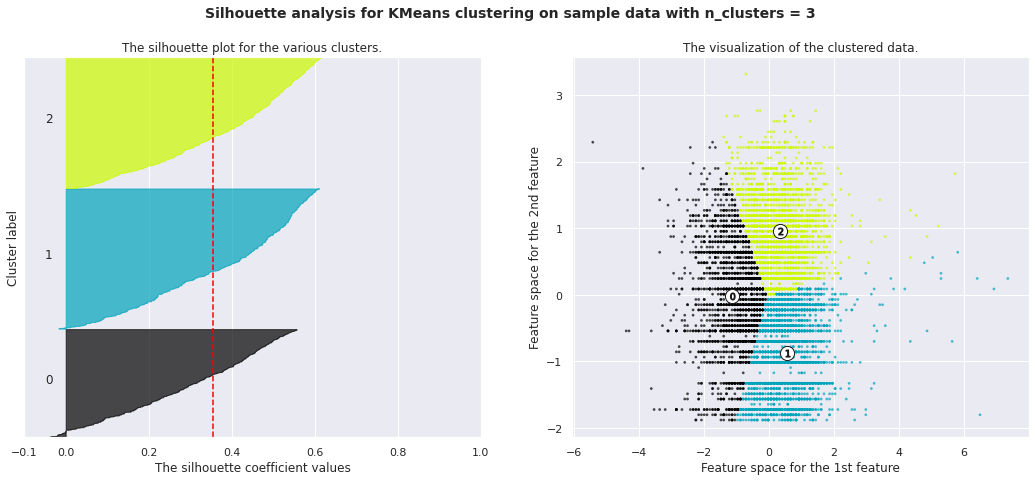

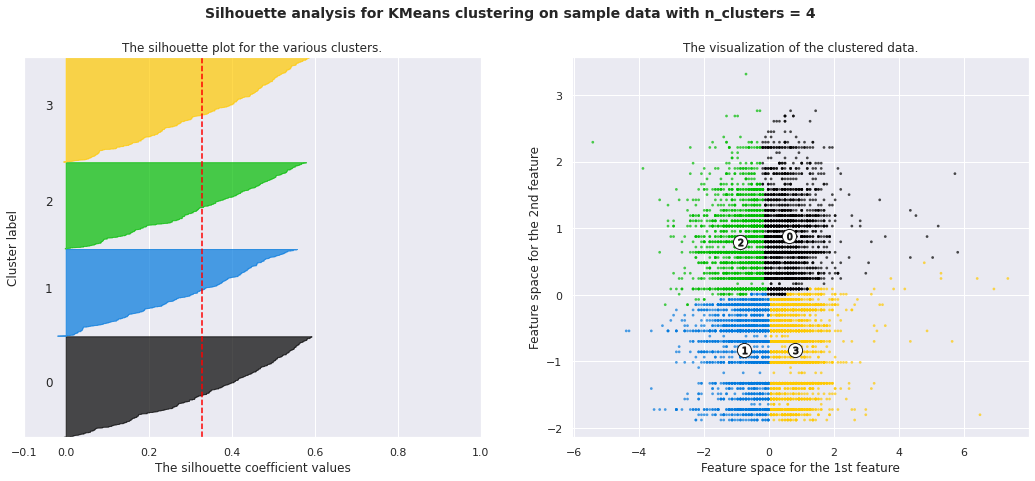

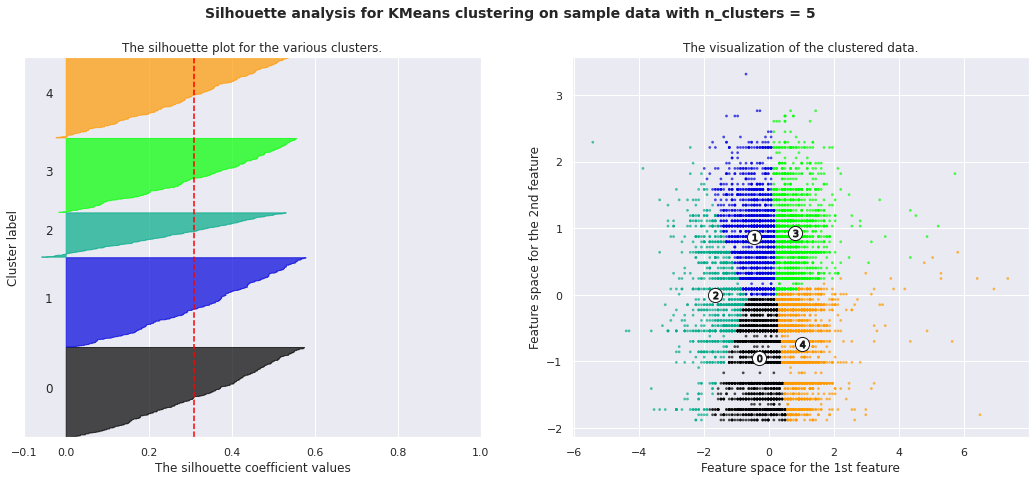

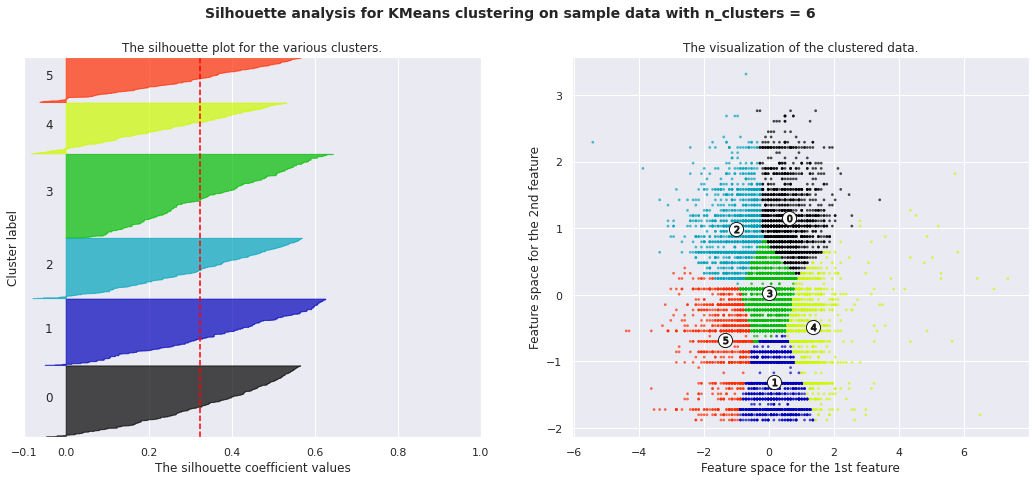

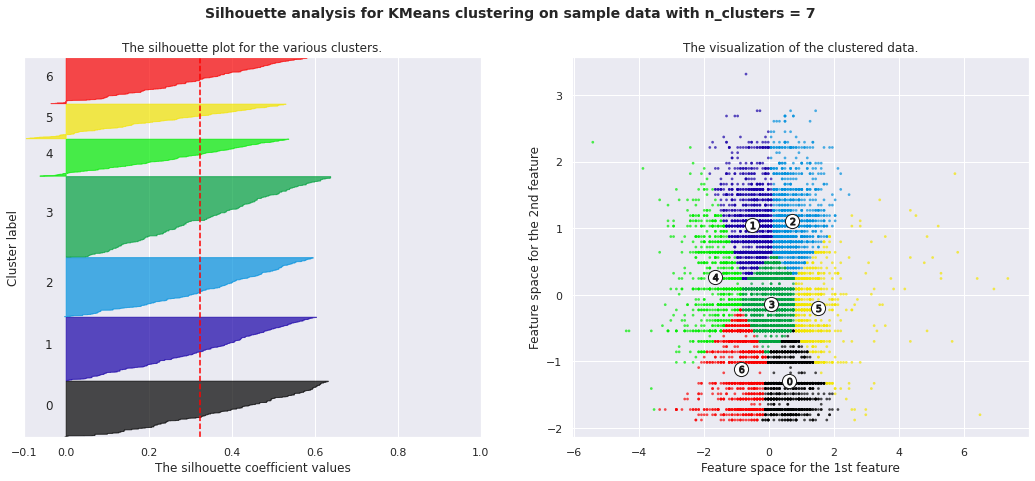

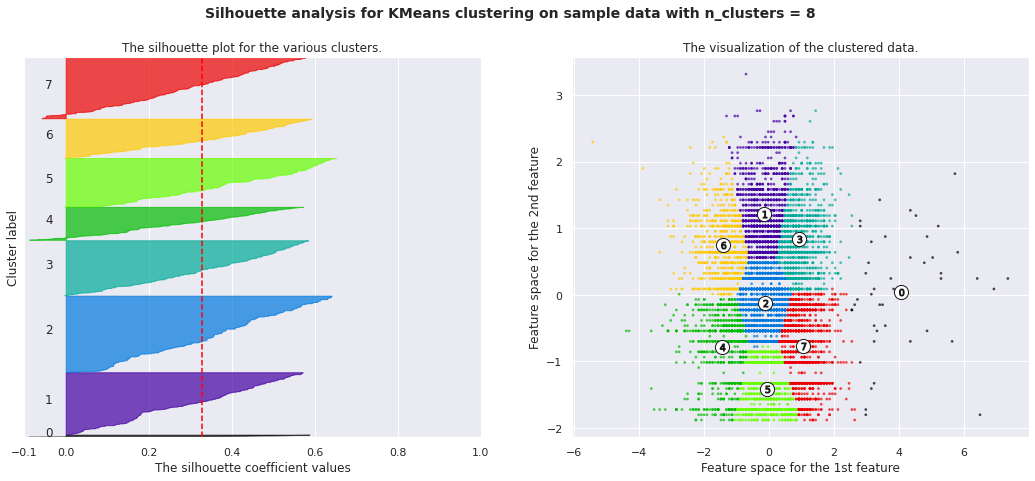

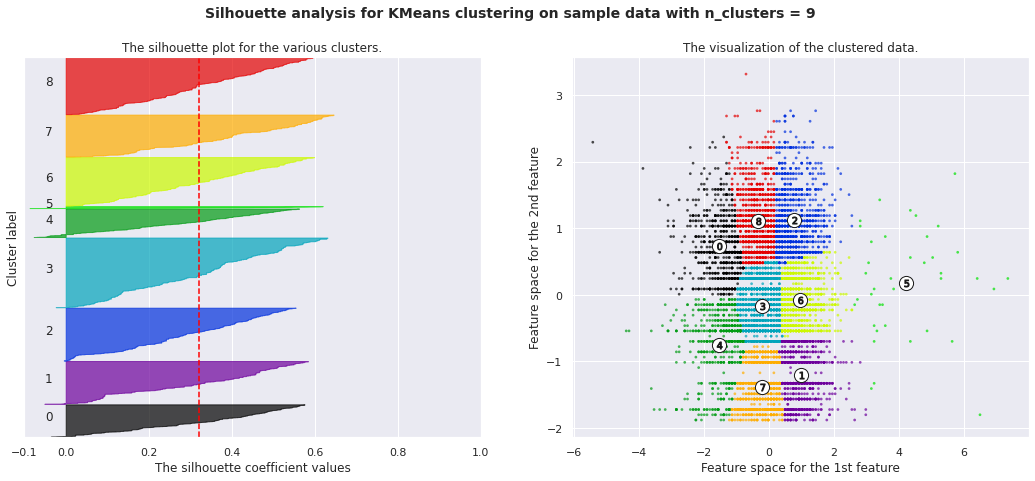

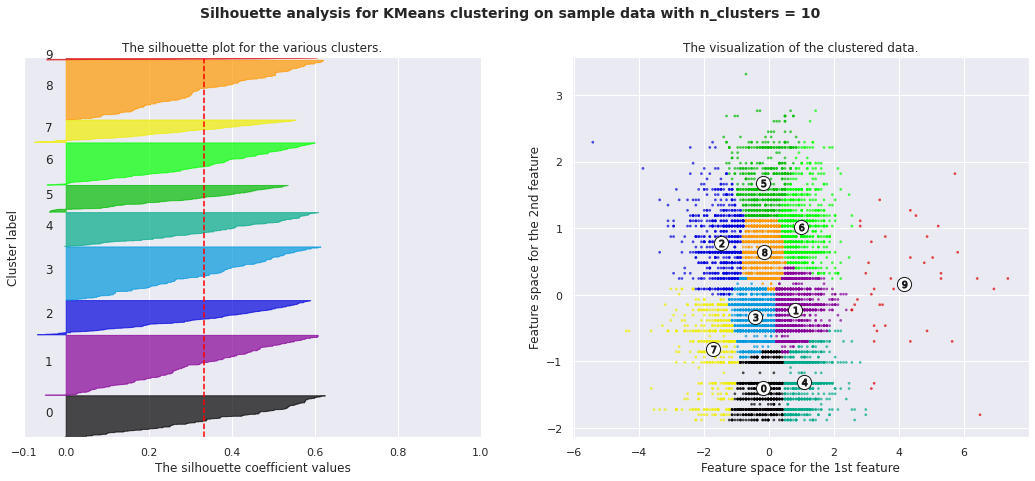

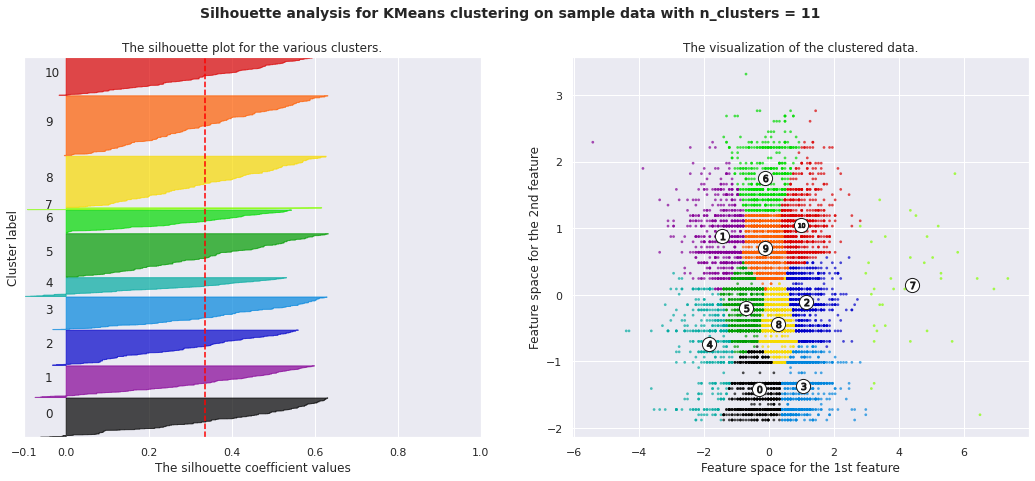

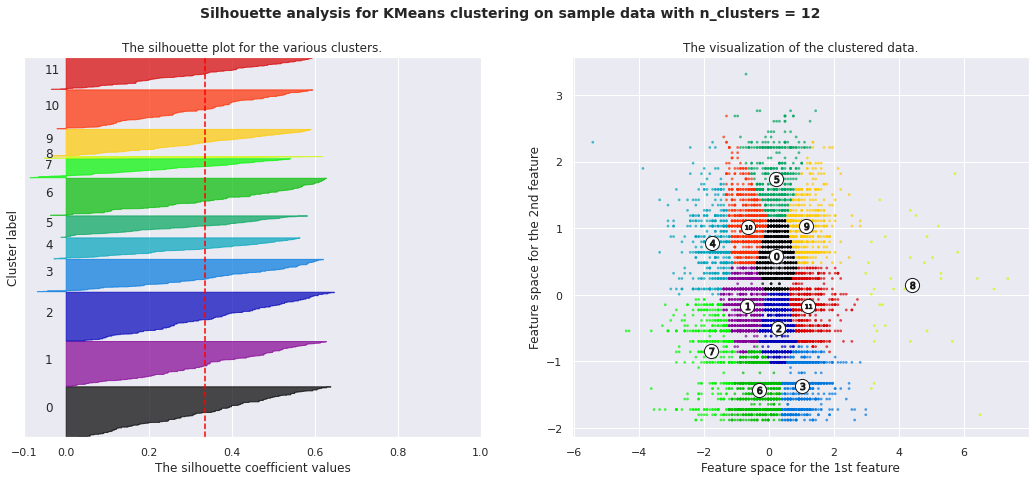

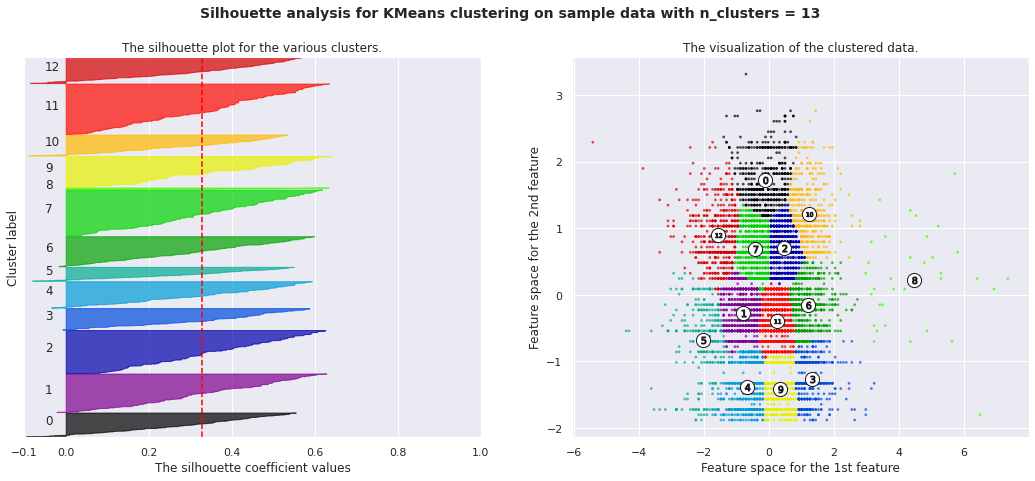

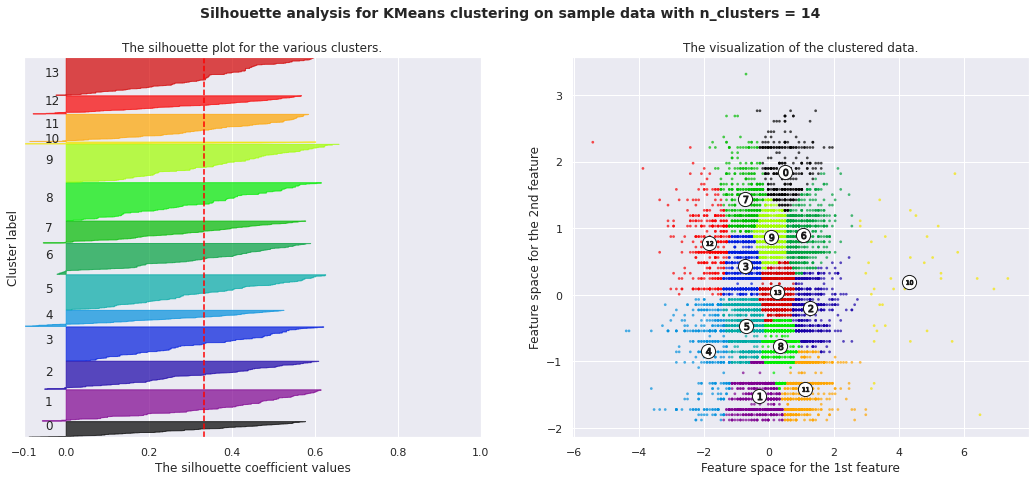

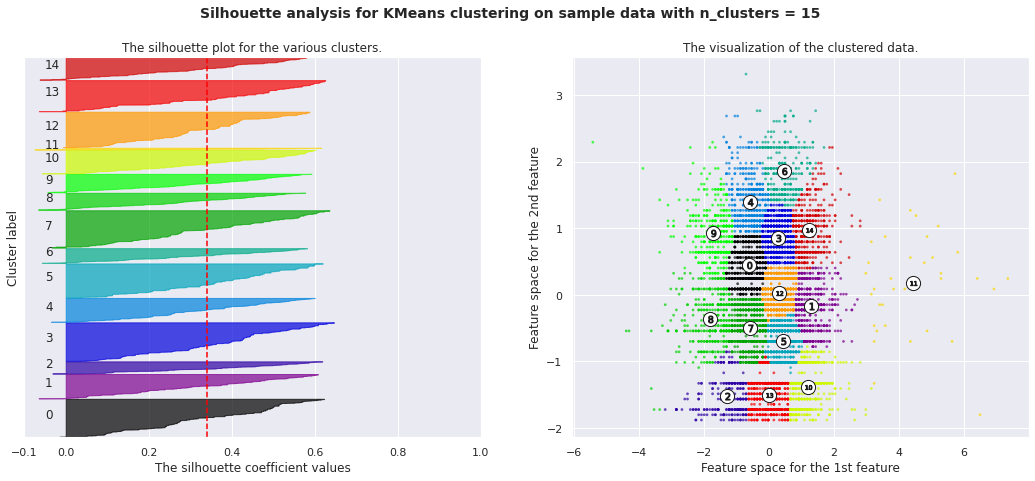

In [120]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#Using elbow curve to find optimal value of k

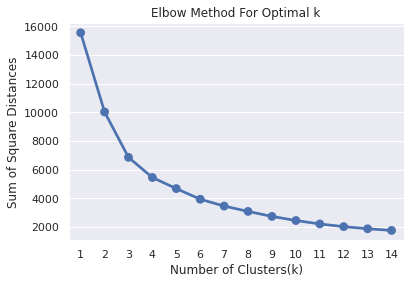

In [121]:
X_features_rec_mon=df[['length','length_listed']]
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#Implementing K-means Clustering unsupervised ML algorithm

In [123]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

**We will apply kmeans clustering for k=3 to get optimised result**

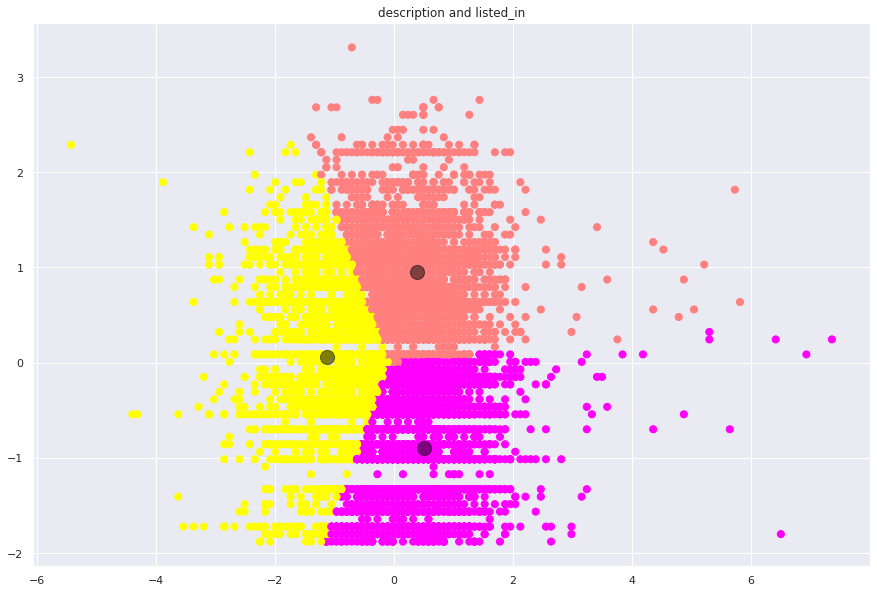

In [125]:
plt.figure(figsize=(15,10))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

**DBSCAN**

Density-based spatial clustering of applications with noise (DBSCAN) is a well-known data clustering algorithm that is commonly used in data mining and machine learning.

The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of poi

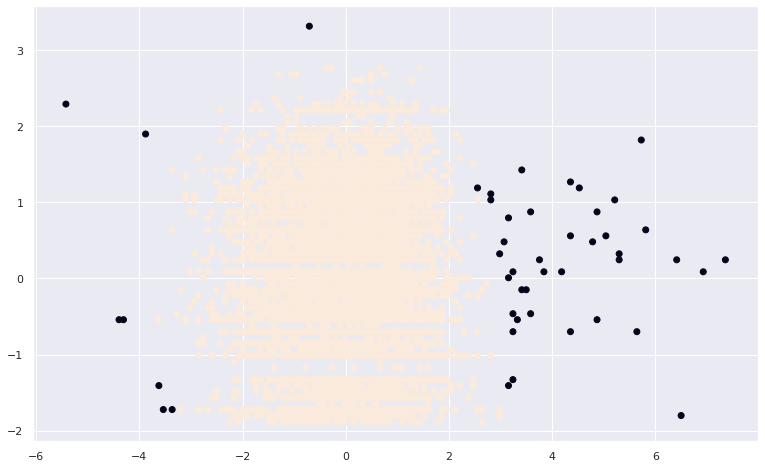

In [127]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=10).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

#Dendogram to find the optimal number of clusters(Hierarchial Clustering)

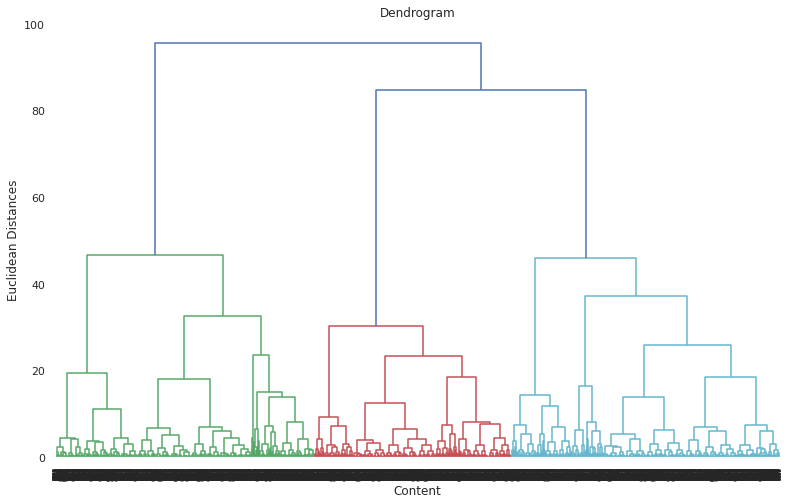

In [128]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() 

**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold**

**No. of Cluster = 3**

#Conclusion



1.   Data set contains 7787 rows and 12 columns in that cast and director features contains large number of missing values so we can drop it and we have 10 features for the further implementation 
2.   We have two types of content TV shows and Movies (30.86% contains TV shows and 69.14% contains Movies)

3.Jan Suter is the most popular directors on Netflix with the most titles are mainly international as well.

4.Anupam Kher and Sharukh Khan are the most popular actor

5.   By analysing the content added over years we get to know that in recent years netflix is focusing movies than TV shows (movies is increased by 80% and TV shows is increased by 73% compare to 2016 data)

6.   The most number of the movies and TV shows release in 2017 and 2020 respectively and united nation have the maximum content on netflix 

7.   On Netflix, Dramas genre contains the maximum content among all of the genres and the most of the content added in december month and less content in february 

8.   By applying the silhouette score method for n range clusters on dataset we got best score which is 0.348 for 3 clusters it means content explained well on their own clusters, by using elbow method after k = 3 curve gets linear it means k = 3 will be the best cluster

9.   Applied different clustering models Kmeans, hierarchical, Agglomerative clustering  on data we got the best cluster arrangments 

10.   By applying different clustering algorithms to our dataset .we get the optimal number of cluster is equal to 3


